In [35]:
%pip install torch torchvision torchaudio 

In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Set seed for reproducibility
torch.manual_seed(42)

In [37]:
# tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229]])
torch.randn(1,5)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229]])

In [38]:
# true relationship y = 7x + 6

true_w = 7.0
true_b = 6.0

# 10 000 numbers in one row matrix 
x_tensor = torch.randn(100, 1)

y_true = true_w*x_tensor + true_b

noise = torch.randn(100, 1)*0.5
y_noisy = y_true + noise

print("Data Created")
print(f"x_tensor shape: {x_tensor.shape}")
print(f"y_true_shape: {y_true.shape}")
print(f"y_noisy_shape: {y_noisy.shape}")

Data Created
x_tensor shape: torch.Size([100, 1])
y_true_shape: torch.Size([100, 1])
y_noisy_shape: torch.Size([100, 1])


In [39]:
# --------------------------- #
#       Data Loader           #
# --------------------------- #

# combine x and y into a dataset 
dataset = TensorDataset(x_tensor, y_noisy)

# create the data loader 
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print("DataLoader is created")
print(f"Batch size : {batch_size}")
print(f"Number of batches: {len(dataloader)}")


DataLoader is created
Batch size : 64
Number of batches: 2


In [40]:
# test the data loader 
i = 0
for batch_x, batch_y in dataloader:
    print(50*"-")
    print(f"batch_x shape: {batch_x.shape}")
    print(f"batch_y shape: {batch_y.shape}")
    print(50*"-")
    i += 1
    if i == 10 :
        break 
    

--------------------------------------------------
batch_x shape: torch.Size([64, 1])
batch_y shape: torch.Size([64, 1])
--------------------------------------------------
--------------------------------------------------
batch_x shape: torch.Size([36, 1])
batch_y shape: torch.Size([36, 1])
--------------------------------------------------


In [41]:
# ---------------------------------- #
#        Defining the model          #
# ---------------------------------- #

import torch.nn as nn 

class linearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # one input one output 

    # how the data should go through the layers
    def forward(self, x):
        x = self.linear(x)
        return x 
model = linearModel()
print("Model has created:") 
print(model)


Model has created:
linearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [42]:
# ---------------------------------- #
#          Loss Function             #
# ---------------------------------- #


creation = nn.MSELoss()

print("Loss function created")
print(creation)


# Example: calculate loss
predictions = torch.tensor([3.0, 5.0, 7.0],dtype=torch.float32)
targets = torch.tensor([2.5, 5.5, 7.0],dtype=torch.float32)

loss = creation(predictions, targets)

print(f"\nExample:")
print(f"Predictions: {predictions}")
print(f"Targets: {targets}")
print(f"Loss (MSE): {loss.item():.4f}")


Loss function created
MSELoss()

Example:
Predictions: tensor([3., 5., 7.])
Targets: tensor([2.5000, 5.5000, 7.0000])
Loss (MSE): 0.1667


In [43]:
# ---------------------------------- #
#            Optimizer               #
# ---------------------------------- #

import torch.optim  as optim 

# create the optimizer 
learing_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr = learing_rate)

print(f"\nLearning rate: {learing_rate}")
print(f"Optimizing parameters: {len(list(model.parameters()))} tensors")


Learning rate: 0.001
Optimizing parameters: 2 tensors


Starting training...

Epoch [1/100], Loss: 75.6593
Epoch [2/100], Loss: 77.7596
Epoch [3/100], Loss: 81.3214
Epoch [4/100], Loss: 73.3801
Epoch [5/100], Loss: 74.6918
Epoch [6/100], Loss: 75.0991
Epoch [7/100], Loss: 77.4758
Epoch [8/100], Loss: 71.2310
Epoch [9/100], Loss: 72.0571
Epoch [10/100], Loss: 73.5294
Epoch [11/100], Loss: 75.1936
Epoch [12/100], Loss: 74.8138
Epoch [13/100], Loss: 67.0546
Epoch [14/100], Loss: 74.2727
Epoch [15/100], Loss: 74.3845
Epoch [16/100], Loss: 69.4330
Epoch [17/100], Loss: 67.9565
Epoch [18/100], Loss: 70.0544
Epoch [19/100], Loss: 68.8385
Epoch [20/100], Loss: 68.7408
Epoch [21/100], Loss: 67.4506
Epoch [22/100], Loss: 65.5460
Epoch [23/100], Loss: 64.5592
Epoch [24/100], Loss: 66.8828
Epoch [25/100], Loss: 63.2570
Epoch [26/100], Loss: 65.1124
Epoch [27/100], Loss: 62.0538
Epoch [28/100], Loss: 64.3339
Epoch [29/100], Loss: 68.0720
Epoch [30/100], Loss: 63.3268
Epoch [31/100], Loss: 62.2158
Epoch [32/100], Loss: 59.3753
Epoch [33/100], Loss: 61.26

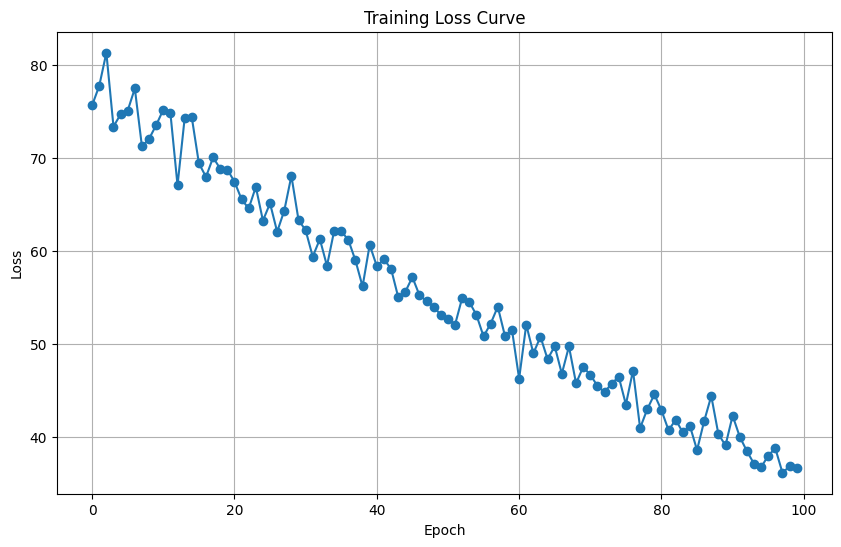


Final Loss: 36.6454


In [44]:
# ---------------------------------- #
#        Training Loop               #
# ---------------------------------- #


import matplotlib.pyplot as plt
num_epochs = 100
losses = []  # Track losses for plotting
batch_losses = []

print("Starting training...\n")

# model = LinearModel()

for epoch in range(num_epochs):
    epoch_loss = 0

    for batch_x, batch_y in dataloader:
        # 1. Zero gradients (FIRST!)
        optimizer.zero_grad()

        # 2. Forward pass
        predictions = model(batch_x)

        # 3. Calculate loss
        loss = creation(predictions, batch_y)

        # 4. Backward pass
        loss.backward()

        # 5. Update parameters
        optimizer.step()

        epoch_loss += loss.item()



    # Calculate average loss for this epoch
    avg_loss = epoch_loss / len(dataloader)
    losses.append(avg_loss)

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("\nTraining complete!")

plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

print(f"\nFinal Loss: {losses[-1]:.4f}")
